# Python для Анализа Данных

# Домашнее задание 8: Визуализация данных с MatPlotLib

## Задачи Light

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Задача 1

Постройте график экспоненты. Подпишите оси. Дайте название графику.

Text(0.5, 1.0, 'график экспоненты')

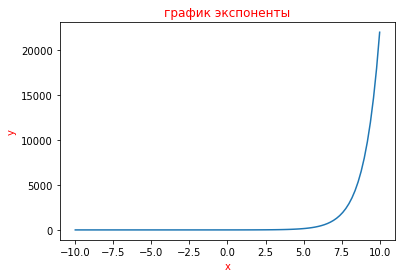

In [2]:
x = np.linspace(-10,10, 100)
y = np.exp(x)
plt.plot(x,y)
plt.xlabel('x', color='r')
plt.ylabel('y', color='r')
plt.title('график экспоненты', color='r')

### Задача 2

Постройте график функции $\rho = 4 \sin(2\phi)$ в полярных координатах. Линия должна быть любого нестандартного цвета из доступных по ссылке ниже (на ваш вкус). Дайте название графику.

https://matplotlib.org/3.1.0/gallery/color/named_colors.html

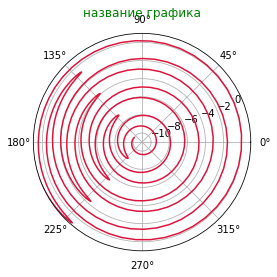

In [3]:
phi = np.linspace(-10, 10, 1000)
rho = 4 * np.sin(2 * phi)

ax = plt.subplot(111, projection='polar')
ax.plot(rho, phi, color ='crimson')
ax.set_rmax(1)
ax.set_title('название графика', color ='g')
plt.show();

### Задача 3

Постройте графики функций $y = x^3$ и $y = x^2$ на одном графике. 

* Дайте название графику 
* Дайте названия осям
* Присвойте лейблы и выведите легенду
* Графики функций должены быть отрисованы пунктирными линиями (любыми из доступных на ваш вкус) 

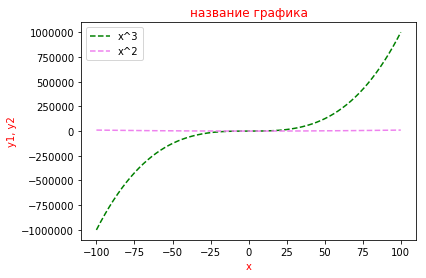

In [4]:
x = np.linspace(-100,100,500)
y1 = x**3
y2 = x**2
plt.plot(x, y1, 'c--', label='x^3', color='green')
plt.plot(x, y2, 'c--', label='x^2', color='violet')
plt.title('название графика', color='r')
plt.xlabel('x', color='r')
plt.ylabel('y1, y2', color='r')
plt.legend()
plt.show();

### Задача 4

Выведите на экран картинку ascent, которая подгружается кодом ниже

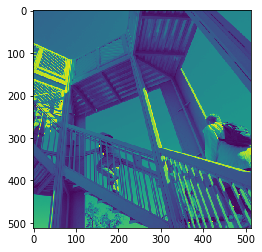

In [5]:
from scipy import misc
img = misc.ascent()
plt.imshow(img)
plt.show()

### Задача 5

Выведите на экран картинку выше в серых цветах (grayscale)

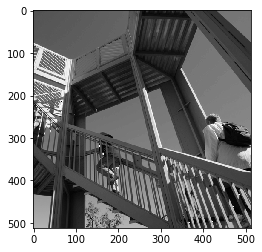

In [6]:
plt.imshow(img, cmap='gray')
plt.show()

## Задачи Pro

### Задача 5

Для датасета "Ирисы", который подгружается кодом ниже, нарисуйте точечную диаграмму (scatter plot) всех четырех признаков. Каждый признак должен быть нарисован на отдельном графике. Используйте для этого subplot формата 2 на 2. Графики должны быть читаемыми, т.е. отрегулируйте размер subplot'ов. Добовьте названия признаков к каждому графику в качестве имени графика. Используйте метки классов (y) в качестве цветовой разметки. Добавьте расшифровку цветов, соответствующих меткам классов, в качестве лейблов.

P.S. используйте функцию plt.scatter(x, y, color)

In [7]:
from sklearn import datasets
data = datasets.load_iris(return_X_y=False)
X = data.data
y = data.target
names = data.target_names

In [11]:
labels = ['setosa', 'versicolor', 'virginica']
label = np.where(y == 0, 'setosa', np.where(y == 1, 'versicolor', 'virginica'))

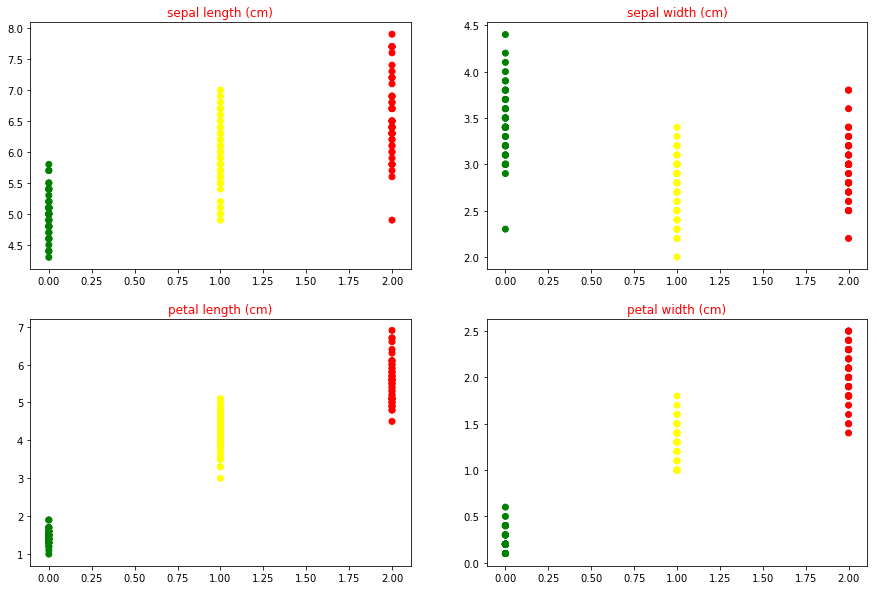

In [13]:
f, axes = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(15,10))
color = np.where(y == 0, 'green', np.where(y == 1, 'yellow', 'red'))
axes[0,0].scatter(y, X[:,0], c=color)
axes[0,0].set_title(data.feature_names[0], color='red')
axes[0,1].scatter(y, X[:,1], c=color)
axes[0,1].set_title(data.feature_names[1], color='red')
axes[1,0].scatter(y, X[:,2], c=color)
axes[1,0].set_title(data.feature_names[2], color='red')
axes[1,1].scatter(y, X[:,3], c=color)
axes[1,1].set_title(data.feature_names[3], color='red')
plt.show()

### Задача 6

Постройте гистограмму для первого признака в датасете выше следующим образом:
* на одном графике должно быть три гистаграммы, по одной на каждый класс
* для этого используйте методологии подвыборки массива с условием
* кол-во бинов должно определятся автоматически (режим "auto")
* гистограмма должна быть читаемой, т.е. добавьте подписи, лейблы, названия и т.д.

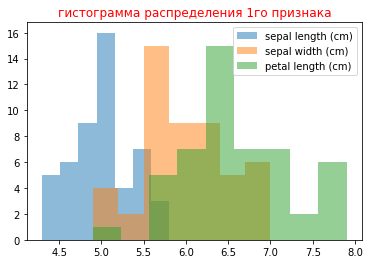

In [50]:
plt.hist((X[np.where(data.target == 0)][:,0]), bins='auto', alpha=0.5, label=data.feature_names[0])
plt.hist((X[np.where(data.target == 1)][:,0]), bins='auto', alpha=0.5, label=data.feature_names[1])
plt.hist((X[np.where(data.target == 2)][:,0]), bins='auto', alpha=0.5, label=data.feature_names[2])
plt.title('гистограмма распределения 1го признака', color='r')
plt.legend()
plt.show()

### Задача 7

Посчитайте матрицу корреляции между признаками и нарисуйте ее как heatmap. Подберите подходящую по смысле цветовую гамму. Добавьте названия признаков в качестве тиков по осям. Добавьте отрисовку цветовой шкалы.

In [62]:
df= pd.DataFrame(data= data.data, columns= data.feature_names)
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


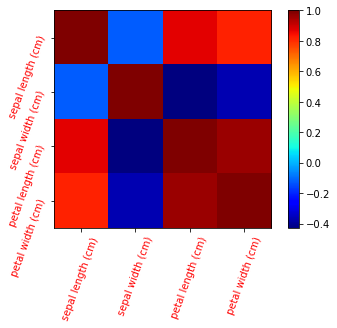

In [117]:
plt.imshow(df.corr(), cmap='jet', label=data.feature_names)
plt.colorbar()
plt.xticks(np.arange(4), data.feature_names, color='r', rotation=70)
plt.yticks(np.arange(4), data.feature_names, color='r', rotation=70)
plt.show()